In [1]:
# Base import and functions

import imutils
import cv2
from imutils import contours
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, adjust_log
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet, denoise_bilateral
from skimage.filters import threshold_niblack
from skimage.util import img_as_float, img_as_ubyte, img_as_uint
from skimage.morphology import reconstruction
from skimage.morphology import remove_small_objects, remove_small_holes
from skimage.morphology import disk, diamond, square
from skimage.filters import rank
from skimage.filters import threshold_mean
from skimage.morphology import erosion, dilation, opening, closing, binary_opening, binary_closing, binary_dilation, binary_erosion

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

import skimage
print("skimage: " + skimage.__version__)  # Must be greater then 0.14 for Chain Vesa

skimage: 0.14dev


100%|██████████| 145/145 [00:12<00:00, 11.78it/s]


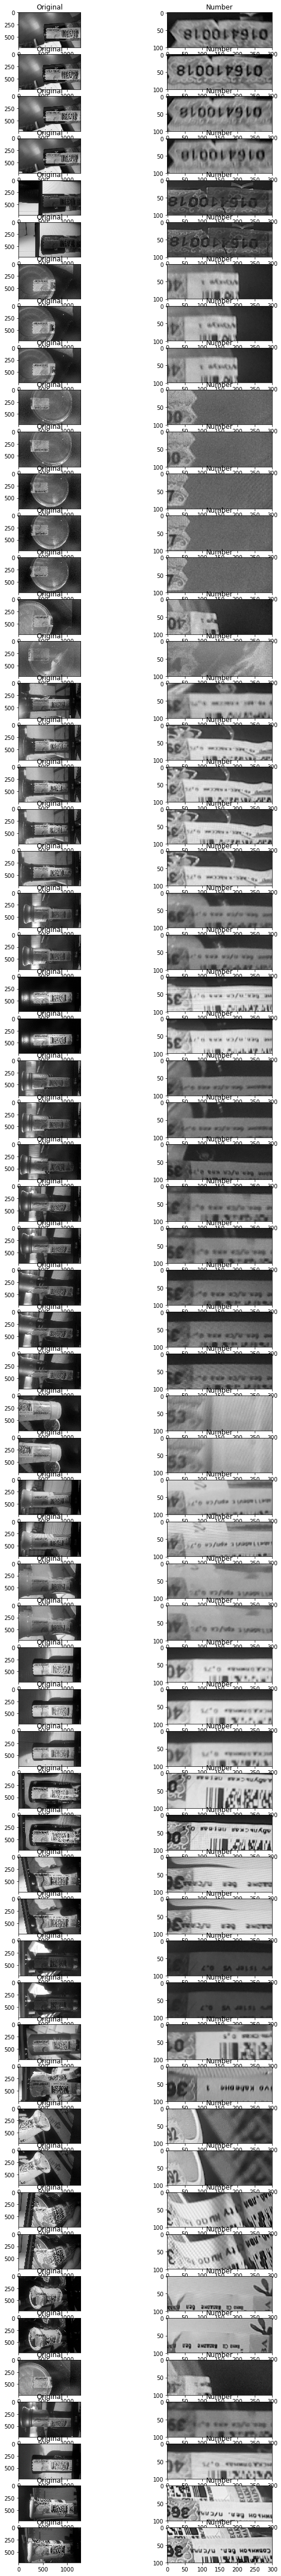

In [8]:
DIR = 'data/monitor'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".PNG") or name.endswith(".png"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 200))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".PNG") or filename.endswith(".png"))) or (current_file_index > 60):
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    number = input_src[300:300+100, 550:550+300]

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Number')
    
    current_file_index += 1

plt.show()

100%|██████████| 145/145 [00:12<00:00, 11.73it/s]


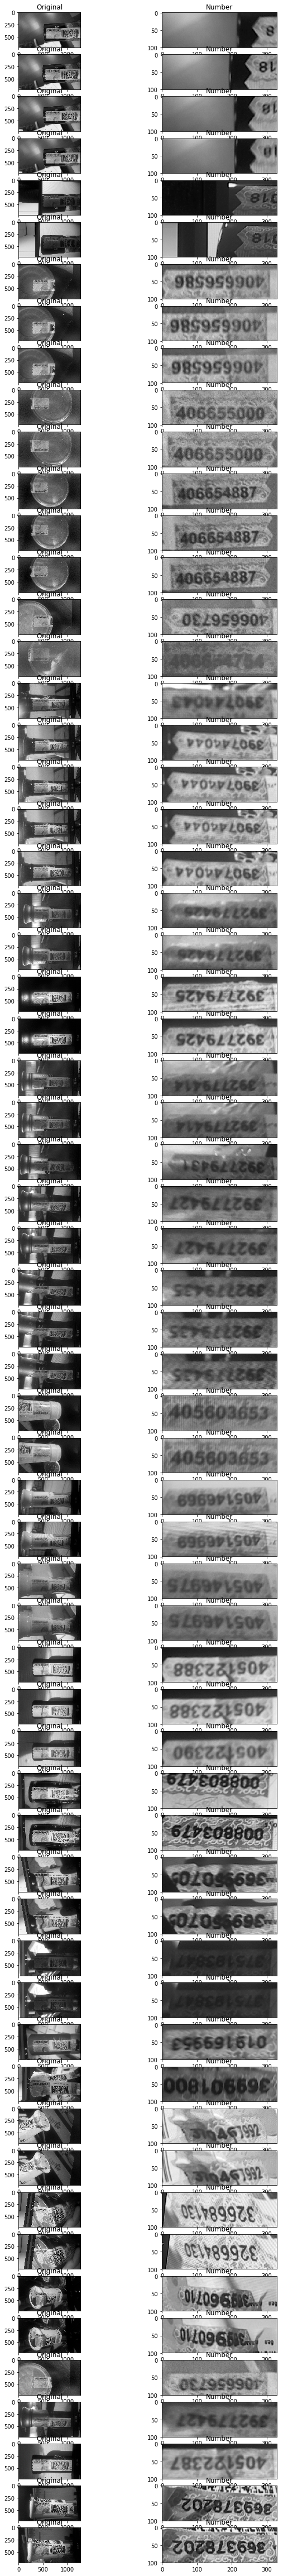

In [13]:
DIR = 'data/monitor'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".PNG") or name.endswith(".png"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 200))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".PNG") or filename.endswith(".png"))) or (current_file_index > 60):
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    number = input_src[310:310+100, 300:300+330]

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Number')
    
    current_file_index += 1

plt.show()

100%|██████████| 145/145 [00:12<00:00, 11.32it/s]


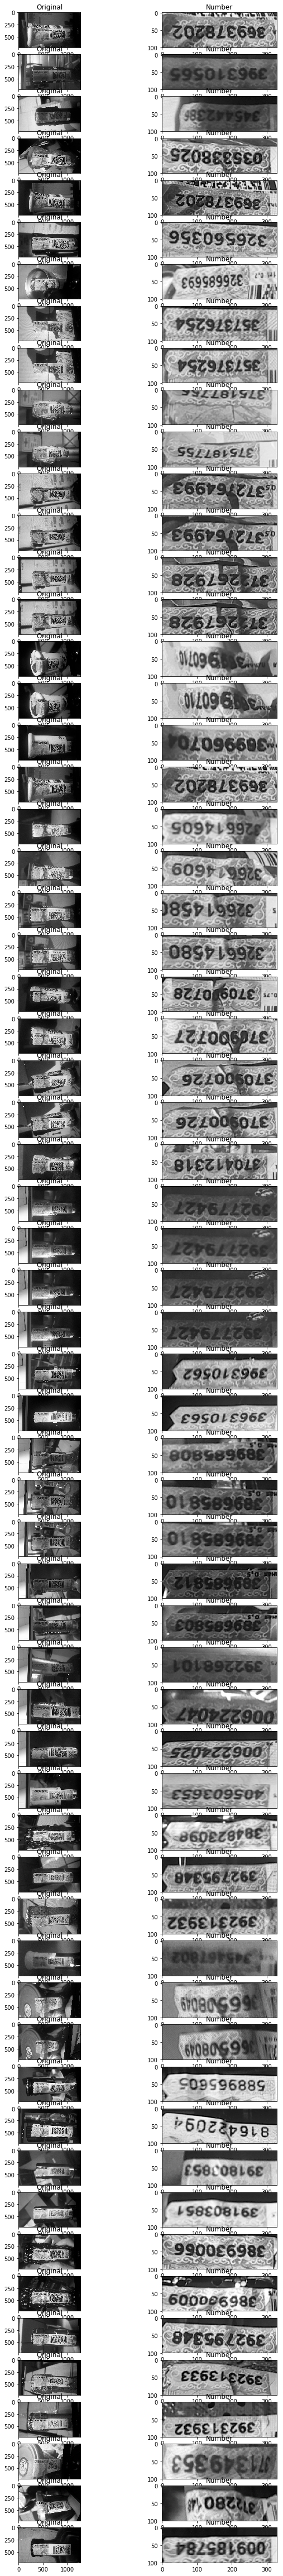

In [18]:
DIR = 'data/monitor'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".PNG") or name.endswith(".png"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 200))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".PNG") or filename.endswith(".png"))) or (current_file_index > 120) or (current_file_index < 60):
        current_file_index += 1
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    number = input_src[310:310+100, 300:300+330]

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Number')
    
    current_file_index += 1

plt.show()

100%|██████████| 145/145 [00:05<00:00, 27.61it/s] 


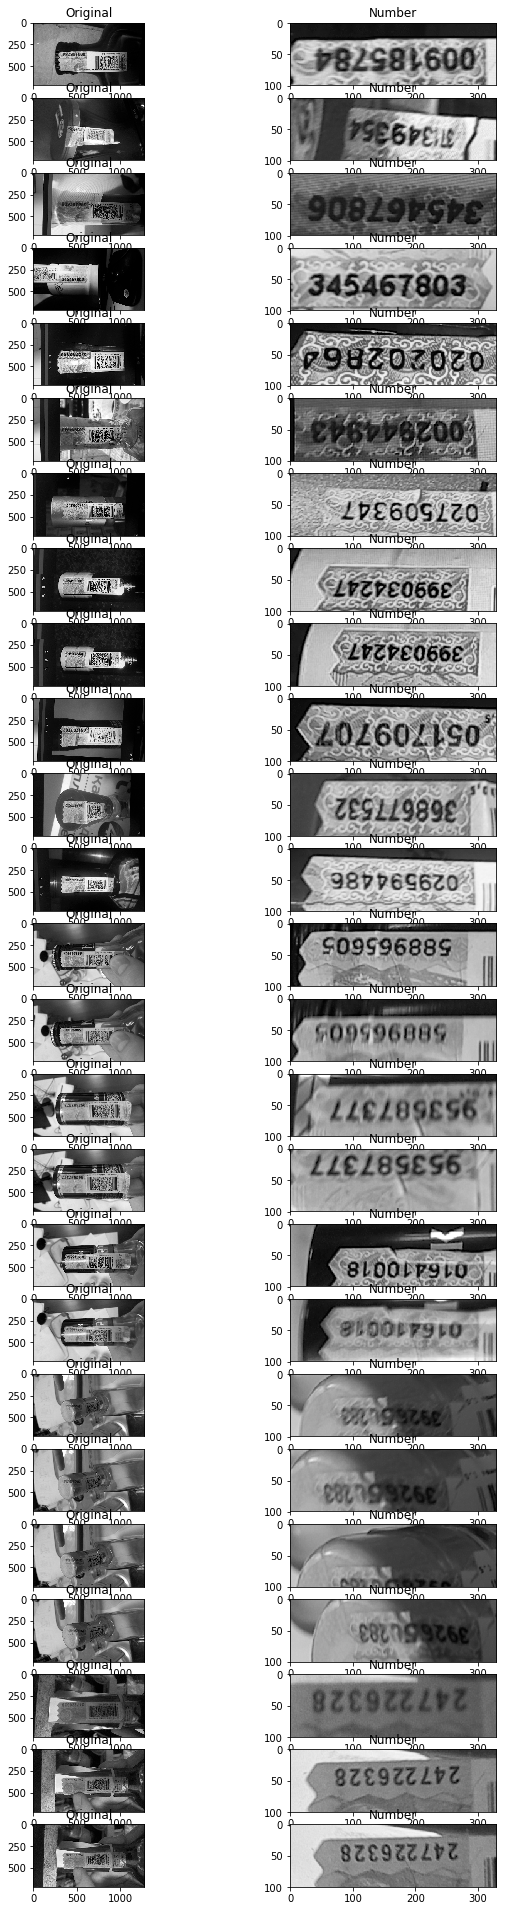

In [19]:
DIR = 'data/monitor'
filescount = len([name for name in os.listdir(DIR) if (name.endswith(".PNG") or name.endswith(".png"))])
current_file_index = 0
fig = plt.figure(figsize=(10, 200))

for filename in tqdm(os.listdir(DIR)):
    if (not (filename.endswith(".PNG") or filename.endswith(".png"))) or (current_file_index < 120):
        current_file_index += 1
        continue

    input_src = cv2.imread(os.path.join(DIR, filename))

    number = input_src[310:310+100, 300:300+330]

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 1)
    imgplot = plt.imshow(cv2.cvtColor(input_src, cv2.COLOR_BGR2RGB))
    a.set_title('Original')

    a = fig.add_subplot(filescount, 2, 2 * current_file_index + 2)
    imgplot = plt.imshow(cv2.cvtColor(number, cv2.COLOR_BGR2RGB))
    a.set_title('Number')
    
    current_file_index += 1

plt.show()